# Let's (Very) Briefly Talk About the Collatz Sequence
The following is pulled from the Collatz conjecture wiki [here](https://en.wikipedia.org/wiki/Collatz_conjecture#Statement_of_the_problem).

Consider the following operation on an arbitrary positive integer.
* If the number is even, divide it by two.
* If the number is odd, triple it and add one.

This function, $f$, may be defined as follows:<br>

&emsp;&emsp; 
$\large f(n) = \begin{cases}
  \frac{n}{2} & \text{if } n \equiv 0 \text{  }\pmod 2\\
  3n + 1 & \text{if } n \equiv 1 \text{  }\pmod2    
\end{cases}$

A sequence can be formed by performing this operation repeatedly, beginning with any positive integer, and taking the result at each step as the input for the next.  In notation:

&emsp;&emsp;
$\large a_i = \begin{cases}
  n & \text{for } i = 0\\
  f(a_{i-1}) & \text{for } i > 0   
\end{cases}$

The Collatz conject states, as simply as possible, that all roads lead to 1, that *any* positive integer will, eventually, step its way to 1 and end the sequence.

<br>
<br>
The following python package covers generating these sequences in a convenient and fairly efficient way, and offers a number of in-built wrappers for matplotlib and pygraphviz for basic visualizations.  It's just for the fun of it and, while performance was taken into account in the tree structure, there are more direct ways and efficient means of generating these sequences.

Support functionality...

In [1]:
from random import randint, seed

seed(112) # Establish a rand seed for consistency...

def nprint(*argv): print(*argv, '\n')
def fprint(f, v): print(f'{f}: ', v, '\n')
    

# Looking Over The Basic Structure

## Modules
Currently **collatzpy** is broken up into three basic modules,
**fpaths**, **tree**, and **plot**

# fpaths() | collatzpy.fpaths()
**fpaths** is a single function that generates some directories for basic things you might create,
a root path, images/graphs, pickles/dills/data, and dot files.
It is entirely optional; you can always specify your own paths each call you make to a function
that requires it.  Its implementation is frankly silly but still convenient when you're just
playing around and generating lots of data.

Without arguments, **fpaths** will generate a root folder in,
    *home/youruser/Documents/collatzpy*
or whatever is equivalent for your OS.

**fpaths stores these locations in a session.json file.  Future imports of the lib in other projects will point to the same directories unless you use virtual envs and specify your own dir at first inialization**

**Kwargs**:
* ***dir*** | A directory, default: None.  Passing this to **fpaths** will set the default path to this location.  Subsequent calls to fpaths will return this dir unless you pass a *reset* or set a new directory yourself.
* ***reset*** | Boolean, default: False. Will reset *dir* to the default */home/youruser/Documents/collatzpy*, etc.  Will not remove previous filepaths nor delete any data stored in them.

**fpaths** will not delete previous directories or their contents, you need to do that yourself.

In [2]:
from collatzpy import fpaths # generates a collection of convenient paths for file saving...

paths = fpaths()
rpath = paths['root']
ipath = paths['imgs']
ppath = paths['pickles']
dpath = paths['dots']

# tree | collatzpy.tree
tree has two associated classes, ***CollatzNode*** and ***CollatzTree***, and the functions, **save_tree()**, and **load_tree()**.

***CollatzNode*** <br>
The node class is trivial but currently contains 3 noteworthy pieces of data, *n*, *next*, and *seq_len*. <br>
* **n** | The value of the node. <br>
* **seq_len** | The calculated sequence length it takes to get to 1. <br>
* **next** | A pointer to the next value in its sequence. <br>

***CollatzTree*** <br>
The meat and potatoes.<br>
The tree class stores the nodes, node sequences, and offers a set of very basic class functions to generate
sequences or return data to the user.

**Instance Methods**: <br>
* **has(n)** | Boolean if the tree contains the node and respective sequence for the integer 'n'.
* **splay(n)** | Returns a dict of the given node instance's variables *n*, *next*, and *seq_len*.
* **best()** | Takes no arguments, returns the same data as splay except from the node in the tree with the highest sequence length.
* **calc_next(n)** | Generally only used internally, will return the next integer in the sequence, given 'n'.
* **collect(n)** | Given an integer 'n', will gather all subsequent nodes in the sequence and add them to the tree. Collect will also update the best node if one is found, and will not waste time repeatedly collecting a number it has already sequenced.
* **collect_from_range(a, b)** | Will collect all numbers in the range of (a, b), inclusive.
* **collect_from_list(some_list)** | Will collect all the numbers in a given list.
* **path(n)** | Will return a list of the number sequence that goes from 'n' to 1. Will return an empty list for values of 'n' not previously calculated.
* **longest_seq()** | Takes no arguments.  A hold over and slower method of getting the collatz number with the current longest sequence.  Just use *best()*, as it stores that node directly.
* You can also call on the tree instance directly, i.e., **mytree(n)**.  It will return the node itself, not just a copy of the data as with the splay function.

The CollatzTree is built as a collection of dict references and linked nodes.  It's very compact and will only store a number exactly once, taking advantage of the fact that all paths lead to 1.  Lookups are as fast as a dict and sequence traversal is done as a one-way linked list, moving from 'n' to 1.  Peformance is great even for reasonably large numbers,
but no efforts have been made to equal the size, scope, and performance of other programs.  This is more so for making interesting images and viewing smaller subsets of the collatz sequence.


*For reference, as of now, the class can generate and store every sequence from 1 to 1 million in less than 3 seconds on the desktop tested.  That's compactifying a sequence 131,434,424 numbers in total length, to a dict of just 2,168,611.  Every node in the tree will know its path back to 1. The longest sequence under 10^2 (989,345,275,647) can be calculated in a millisecond.  Good enough for casual use.*


### Importing and collecting a few things...

In [3]:
import collatzpy.tree as ctree # import the tree module

mytree = ctree.CollatzTree() # create a tree

mytree.collect(101) # collect the path for a specific number

mytree.collect_from_range(2, 27) # collect the paths in a given range

my_list = [randint(2, 1000) for x in range(100)]
mytree.collect_from_list(my_list) # collect the paths in a given list

### Trying a few instance methods...

In [4]:
# Check if the node is present in the tree
fprint('mytree.has(27)', mytree.has(27))

# retrieve the node object associated with the given number
# fprint('mytree(27)', mytree(27))
    # calling directly on the tree for a nonexistent node will return None

# retrieve the information about the given node
fprint('mytree.splay(27)', mytree.splay(27))
    # calling splay for a nonexistent node will return Nothing
    
# retrieve info associated with the node with the longest path sequence
fprint('mytree.best()', mytree.best())

mytree.has(27):  True 

mytree.splay(27):  {'n': 27, 'seq_len': 111, 'next': 82, 'is_terminal': True} 

mytree.best():  {'n': 667, 'seq_len': 144, 'next': 2002, 'is_terminal': True} 



In [5]:
# return a list of the path from 27 to 1
fprint('mytree.path(27)', mytree.path(27))

mytree.path(27):  [27, 82, 41, 124, 62, 31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1] 



## tree functions | collatzpy.tree

### save_tree() / load_tree() | saving and loading trees
Trees are stored using dill.  They'll retain their full state when loaded in.

**save_tree**(*tree, fpath, fname*)
* Will save your *tree* to the combined path/loc *fpath*/*fname*.
* You don't really need to specify an extension in *fname*, but you probably should.

**load_tree**(*fpath, fname*)
* Will open your tree from the combined path/loc *fpath*/*fname*.
* You don't really need to specify an extension in *fname*, but you probably should.

In [6]:
ctree.save_tree(mytree, ppath, 'mytree.pickle') # That sweet fpaths var...

mytree_copy = ctree.load_tree(ppath, 'mytree.pickle')

# plot | collatzpy.plot
*plot* has a handful of assorted plot options, **path**, **paths**, **angle_path**, and **node_graph**.

*plot* is built out of matplotlib, numpy, and pygraphviz, and largely should be thought of as a collection of preconfigured plot types that look nice with the tree data.

In [7]:
import collatzpy.plot as cplot

## path() | plot.path()
Plot the sequence of numbers from n to 1.

**path**(*tree, n, \**kwargs*)
* ***tree*** | The tree you want to plot
* ***n*** | The collatz number and path/sequence you want to plot

***Kwargs***
* ***save*** | Boolean, default: False, will save the plot to a png file if set to True.  If the *output_name* kwarg isn't set, an output name based on the the current date/local time will be generated and the image will be saved to the current working directory.
* ***output_name*** | String, default: None, will save the plot to the location/name specified by the kwarg, including file extension.  Will save the image regardless of whether the *save* kwarg has been set.

*Currently path styles and associated pyplot functionality are not exposed to the user.  A predefined mplstyle combination has been set and future iterations may expose some of the inner content of the plotter.  This isn't a priority, as most of the plot functions are convenient wrappers for quick plots and users can just make their own if they so choose.*

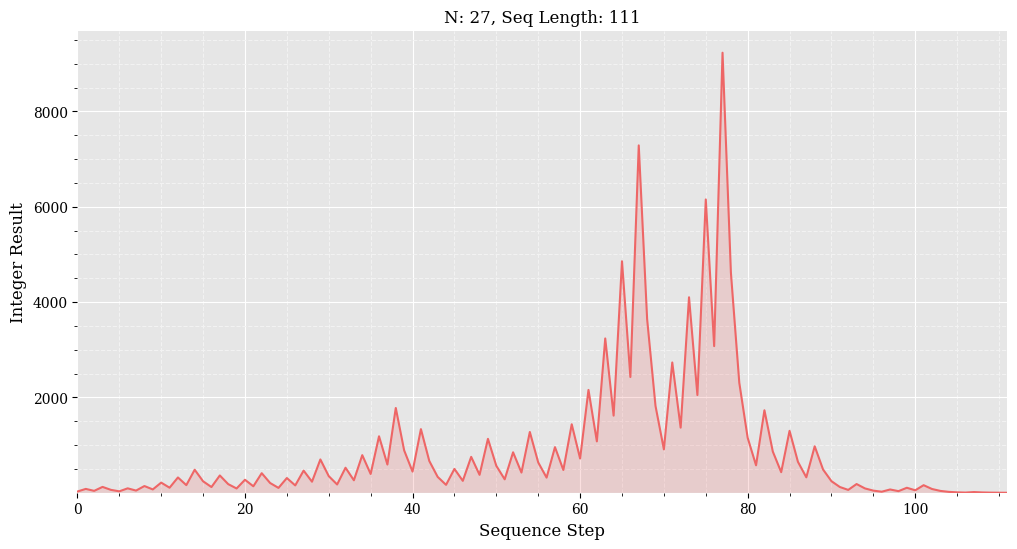

In [8]:
cplot.path(mytree, 27)

## paths() | plot.path()
Plots several paths/sequences from a list at once.  Auto generates an appropriate legend.  Paths are reverse-aligned, meaning that they'll actually all start from one and work back to their respective 'n' values, this makes overlapping sequences more apparent.

**paths**(*tree, n_list, \**kwargs*)
* ***tree*** | The tree you want to plot
* ***n_list*** | The collection of collatz numbers and path/sequences you want to plot

***Kwargs***
* ***save*** | Boolean, default: False, will save the plot to a png file if set to True.  If the *output_name* kwarg isn't set, an output name based on the the current date/local time will be generated and the image will be saved to the current working directory.
* ***output_name*** | String, default: None, will save the plot to the location/name specified by the kwarg, including file extension.  Will save the image regardless of whether the *save* kwarg has been set.

*Currently path styles and associated pyplot functionality are not exposed to the user.  A predefined mplstyle combination has been set and future iterations may expose some of the inner content of the plotter.  This isn't a priority, as most of the plot functions are convenient wrappers for quick plots and users can just make their own if they so choose.*

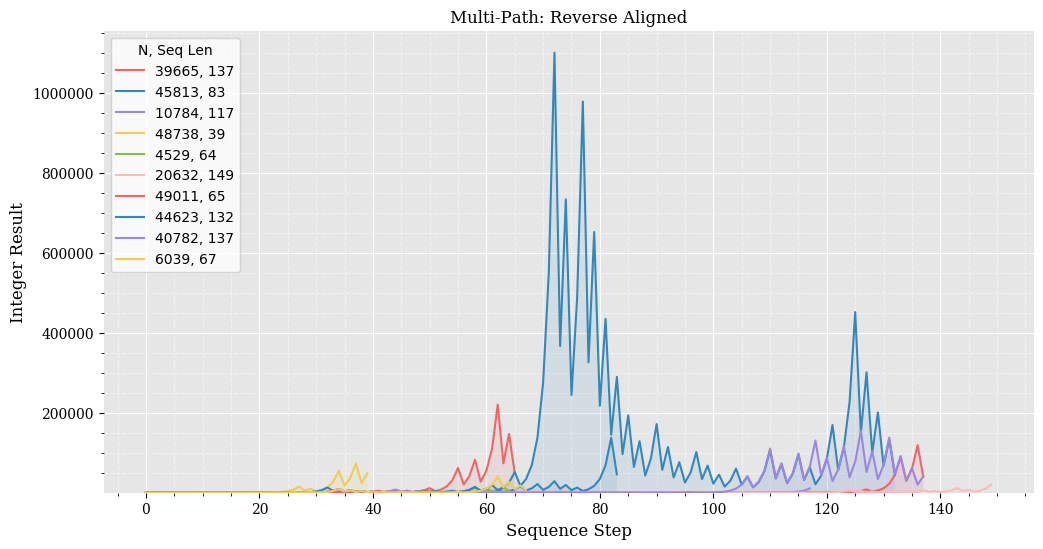

In [9]:
selection = [randint(2, 50000) for x in range(10)]
mytree.collect_from_list(selection)

cplot.paths(mytree, selection)

## angle_path() | plot.angle_path()
A purely artistic view of a collection of collatz sequences.  Each number in a collatz sequence turns left/right based on it being even/odd.  The amount of rotation, rotation bias, and step length are paramiterized.  This method was heavily inspired by this [post](https://www.reddit.com/r/math/comments/38cg9r/a_beautiful_picture_related_to_collatz_conjecture/).

For each number *k* in the sequence starting from *n*:

&emsp;&emsp;&emsp;&emsp; $\large \rho = k \div (1 + k^\sigma)$ <br>
&emsp;&emsp;&emsp;&emsp; $\large \theta = \alpha \times (\beta - \gamma \times (k\bmod2))$ <br>

* $\large \rho$ | Captures the step length per step *k*. <br>
* $\large \theta$ | Captures the rotation per step *k*. <br>
* $\large \sigma$ | Controls the overall length of $\rho$ such that increasingly long sequences have bounded physical length.<br>
* $\large \alpha$ | Sets the maximum angle of rotation per step.
* $\large \beta$ | Works with $\gamma$ to set a ratio of right/left rotation.
* $\large \gamma$ | Works with $\beta$ to set a ratio of right/left rotation. Increasing/Decreasing this changes the apparent righted/lefted-ness of a sequence.

**angle_path**(*tree, n_list, \**kwargs*)
* ***tree*** | The tree you want to plot
* ***selection*** | The collection of collatz numbers and path/sequences you want to plot

There are several *kwargs* that can be passed to this function to control its path behavior, color, size, etc.  More options are available with this type of plot than with others simply do to its complexity.  They're broken down roughly as follows.

***Path Kwargs***<br>
*Very small changes produce signifcantly different plots with the first 4 path kwargs.*
* ***alpha*** | float, default: 0.3
* ***beta*** | float, default: 0.38
* ***gamma*** | float, default: 1.08
* ***sigma*** | float, default: 1.3
* ***cmName*** | colormap string, default: 'plasma_r', changes the colormapping.  Derived from matplotlib.cm.
* ***cmR*** | tuple, default: (0, 1), sets the range of the selected colormap.
* ***pointed*** | Boolean, default: False, Paths will vary in thickness, reaching a point as they approach their end.  This increases the time to plot and has the draw back that segmentation may be seen on thicker, longer paths.

***Save Kwargs***<br>
* ***save*** | Boolean, default: False, will save the plot to a png file if set to True.  If the *output_name* kwarg isn't set, an output name based on the the current date/local time will be generated and the image will be saved to the current working directory.
* ***output_name*** | String, default: None, will save the plot to the location/name specified by the kwarg, including file extension.  Will save the image regardless of whether the *save* kwarg has been set. <br>

***Figure Kwargs***<br>
* ***dpi*** | Int, default: 100, sets the DPI of the image.
* ***pxw*** | Int, default: 2560, sets the image width in pixels.
* ***pxh*** | Int, default: 1440, sets the image height in pixels.
* ***facecolor*** | String/tuple, default: 'black', sets the background color

***Notes***
*Currently path styles and associated pyplot functionality are not exposed to the user.  A predefined mplstyle combination has been set and future iterations may expose some of the inner content of the plotter.  This isn't a priority, as most of the plot functions are convenient wrappers for quick plots and users can just make their own if they so choose.*

*This plot method is a little slow.  The performance of gathering the paths, passing to rho/theta values, and then to xy coordinates is very quick.  The slowness comes from the limitation of asking matplotlib to plot 2000+ paths.*

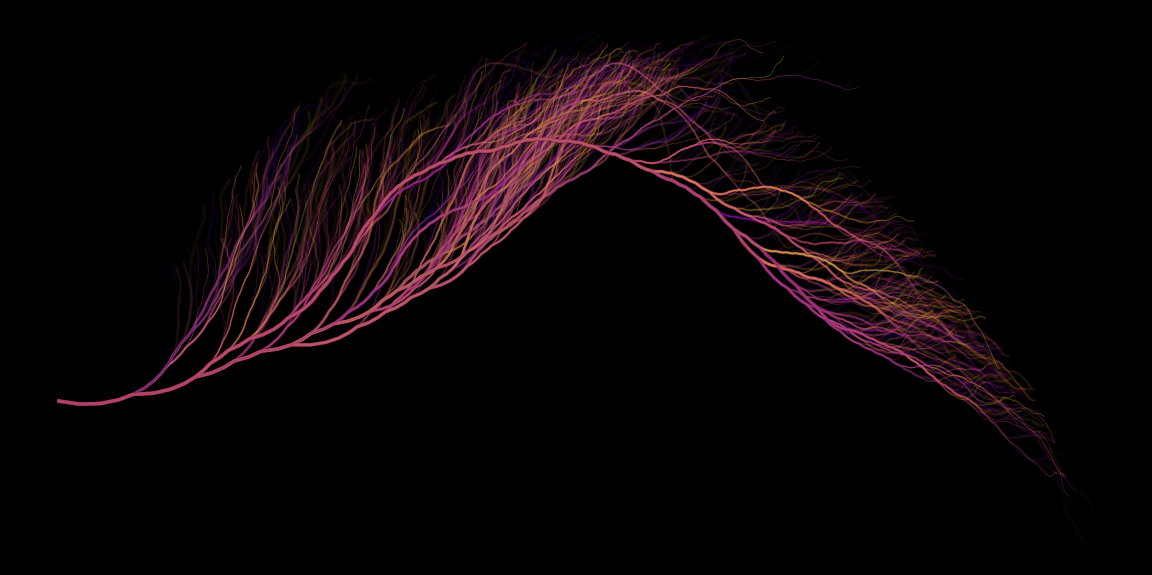

In [10]:
nMin = 2000
nMax = 200000000
nNums = 2000

selection = [randint(nMin, nMax) for n in range(nNums)]
mytree.collect_from_list(selection)

path_args = {'alpha': .3, 'beta': .38, 'gamma': 1.08,
             'sigma': 1.3, 'cmName': 'plasma_r',
             'cmR': (0, 1), 'pointed': False}
save_args = {'save': False, 'output_name': 'images/output.png'}
fig_args = {'dpi': 100, 'pxw': 1600, 'pxh': 800, 'facecolor': 'black'}

cplot.angle_path(mytree, selection, **path_args, **fig_args)

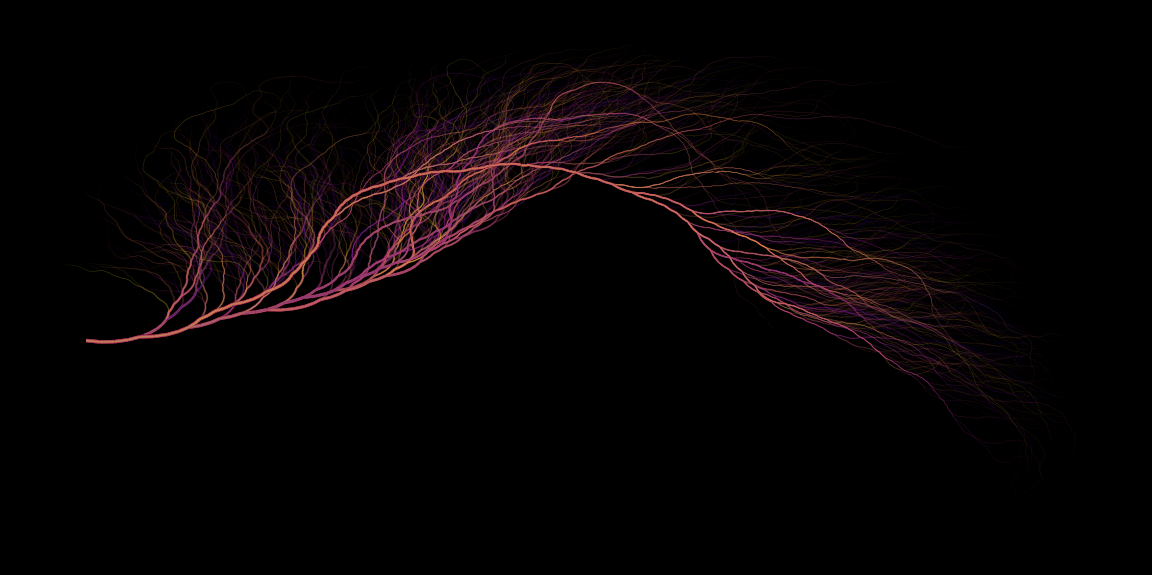

In [11]:
path_args = {'alpha': .2512, 'beta': .7, 'gamma': 2,
             'sigma': 1.2, 'cmName': 'plasma_r', 
             'cmR': (0, 1), 'pointed':True}

cplot.angle_path(mytree, selection, **path_args, **fig_args)

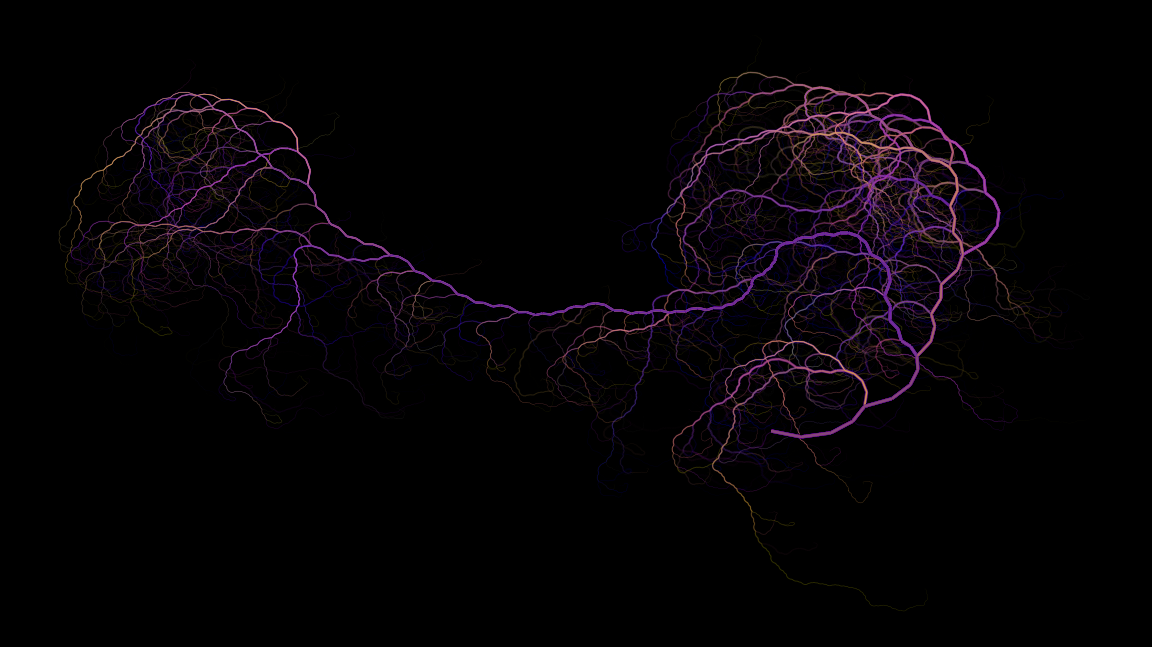

In [15]:
nMin = 1000000
nMax = 200000000
nNums = 2000
mytree2 = ctree.CollatzTree()
selection = [randint(nMin, nMax) for n in range(nNums)]
mytree2.collect_from_list(selection)
path_args = {'alpha': 1.1, 'beta': .386, 'gamma': 1,
             'sigma': 1.3, 'cmName': 'gnuplot2', 
             'cmR': (0, 1), 'pointed':True}
fig_args = {'pxw':1600, 'pxh':900}
cplot.angle_path(mytree2, selection, **path_args, **fig_args)

In [13]:
mytree3 = ctree.CollatzTree()
selection = [x for x in range(2, 1000)]
mytree3.collect_from_list(selection)

%matplotlib inline
graph_attr = {'rankdir': 'TB', 'nodesep':1, 'dpi':100, 'size':'10,16!'}
img_name = f'{ipath}/my_node_graph.png'
cplot.node_graph(mytree3, selection, show=False, img_name=img_name, write_dot=True, graph_attr=graph_attr)

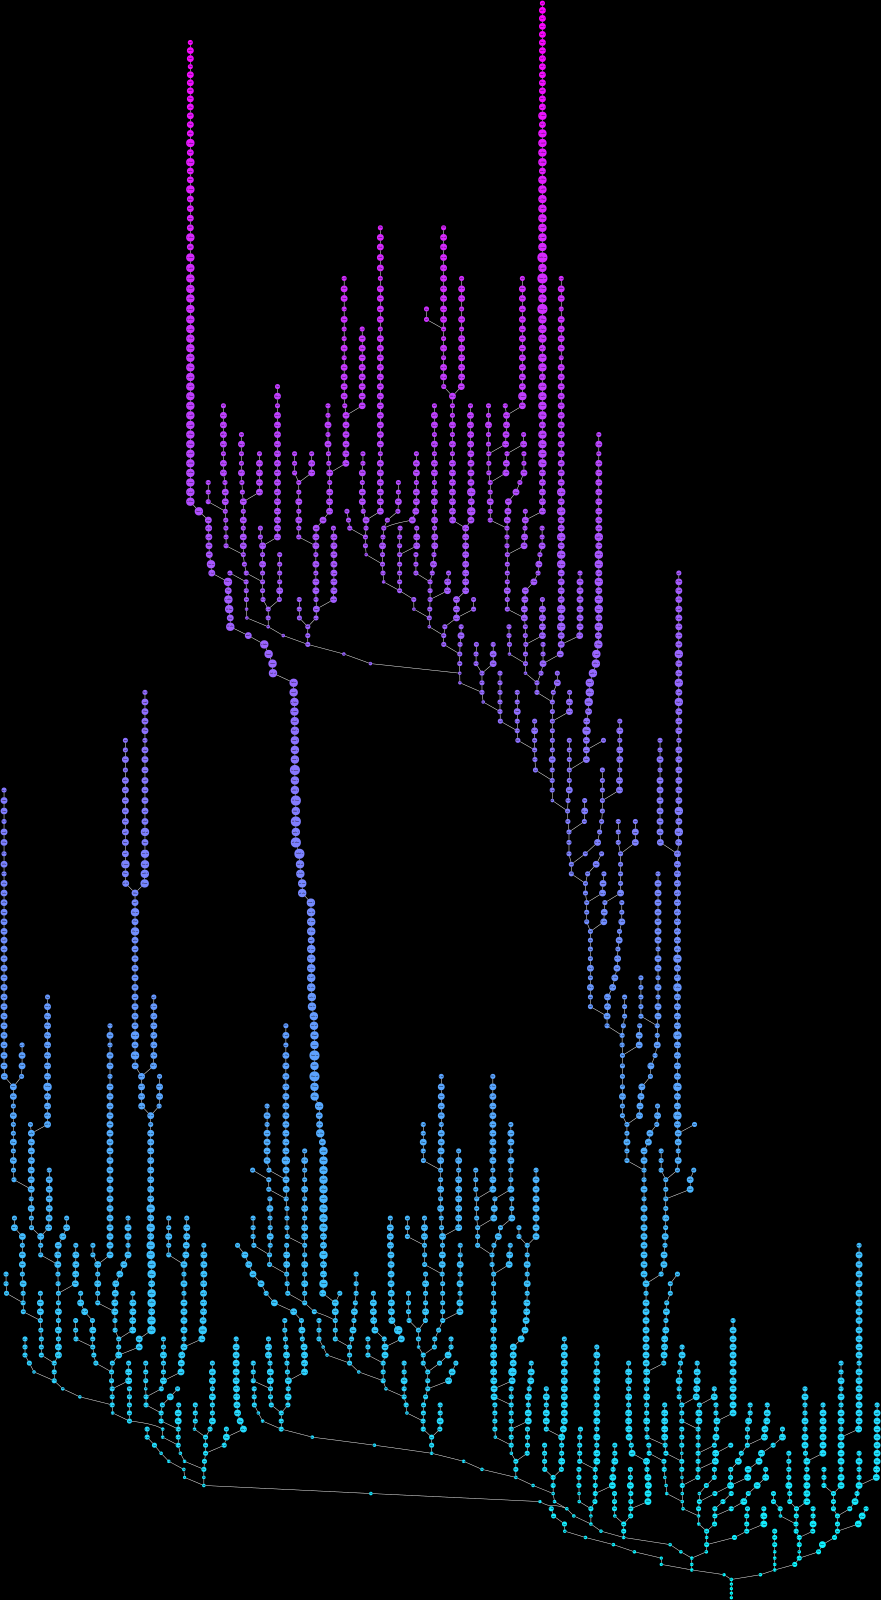

In [14]:
from IPython.display import Image
Image(img_name)